In [25]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import string
import datetime
import tqdm
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import warnings

(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')
names = ['Low Cloud','High Cloud','Clear Sky']
colors = [c2,c3,c1]

In [26]:
df = pickle.load(open('night_df.p','rb'))
df = df[~np.isnan(df['stake_depth'])]

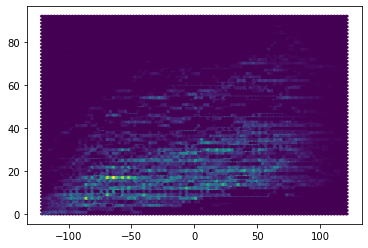

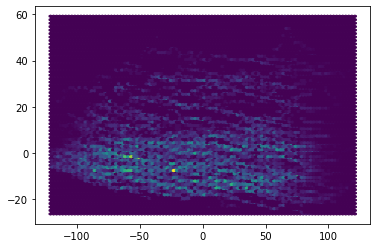

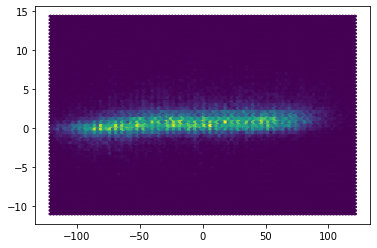

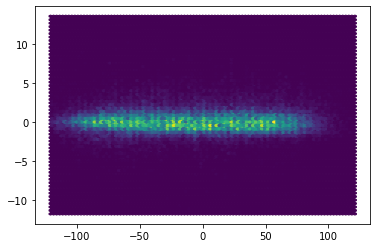

In [27]:
plt.hexbin(df['days_after_jan1'],df['stake_depth'])

plt.show()

lr = linregress(df['days_after_jan1'],df['stake_depth'])

plt.hexbin(df['days_after_jan1'],df['stake_depth_anom'])

plt.show()

plt.hexbin(df['days_after_jan1'],df['diff'])

plt.show()

plt.hexbin(df['days_after_jan1'],df['diff_anom'])

plt.show()

In [34]:
df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>9]

In [35]:
for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],
                       names,
                    ):
    print(name)
    print(dfc_.shape[0])
    
    print(linregress(dfc_['stake_depth_anom'],dfc_['diff_anom']))
    
    

Low Cloud
13708
LinregressResult(slope=-0.0027830214191062424, intercept=-0.48621934606045836, rvalue=-0.036721062687477025, pvalue=1.704876721755023e-05, stderr=0.0006469235145557262, intercept_stderr=0.00860629804439193)
High Cloud
9263
LinregressResult(slope=0.003763511513042037, intercept=-0.44359264736321813, rvalue=0.04799941416580731, pvalue=3.8057312021157976e-06, stderr=0.0008138183868105751, intercept_stderr=0.010917411889756494)
Clear Sky
17290
LinregressResult(slope=0.011101028333939946, intercept=0.4411842341827042, rvalue=0.11037601616012695, pvalue=5.276156316330431e-48, stderr=0.0007602464432186098, intercept_stderr=0.010719269761374493)


lt


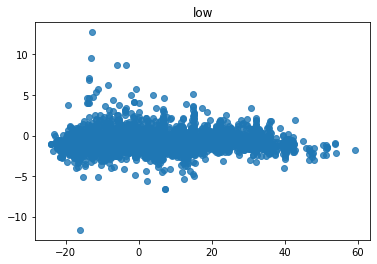

5891
LinregressResult(slope=0.0021072266179806036, intercept=-0.7517085534983166, rvalue=0.030025404592870848, pvalue=0.021190898424001375, stderr=0.0009141253363093545, intercept_stderr=0.013370584155411478)




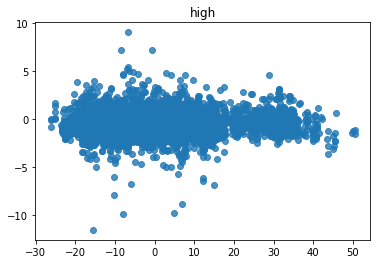

7565
LinregressResult(slope=0.005690448838043963, intercept=-0.4912878338737936, rvalue=0.07257520102931546, pvalue=2.621303260138564e-10, stderr=0.0008992168852227743, intercept_stderr=0.012277564568166421)




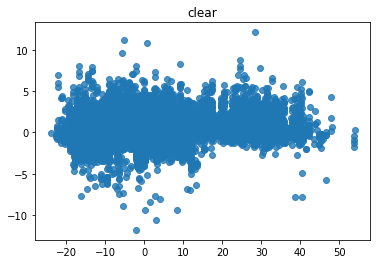

16920
LinregressResult(slope=0.01131977152031649, intercept=0.4380150063633612, rvalue=0.11241086936654895, pvalue=1.0413429789676385e-48, stderr=0.0007692959457258389, intercept_stderr=0.010861950575591483)







mt


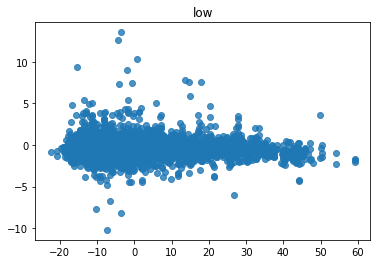

7727
LinregressResult(slope=-0.006604018424924355, intercept=-0.2844722583539639, rvalue=-0.08468063641012441, pvalue=8.925487460787239e-14, stderr=0.0008841219798567888, intercept_stderr=0.01078420973829761)




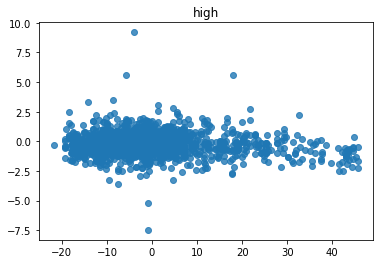

1658
LinregressResult(slope=-0.007925855747334218, intercept=-0.22291401887277157, rvalue=-0.10341280250275844, pvalue=2.4543310532640274e-05, stderr=0.0018732984153869937, intercept_stderr=0.02291596803830899)




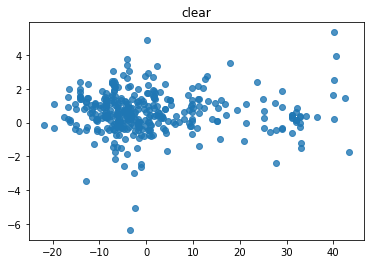

360
LinregressResult(slope=0.00041136646398573555, intercept=0.5783945601523136, rvalue=0.004374569121294902, pvalue=0.9340794715883134, stderr=0.004969903219452793, intercept_stderr=0.06569980637093134)









In [36]:
thresh = -20

for op in ['lt','mt']:
    
    print(op)

    for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],['low','high','clear']):
        
        dfc=dfc_.copy()
        
        var = 'Air temperature'

        if op =='lt':
            dfc = dfc[dfc[var]<thresh]
        else:
            dfc = dfc[dfc[var]>thresh]
                    
        dfc.dropna(inplace=True,subset=['stake_depth_anom','diff_anom'])

        plt.scatter(dfc['stake_depth_anom'],dfc['diff_anom'],label=op+name,alpha=0.8)
        plt.title(name)
        plt.show()
        
        print(dfc.shape[0])
        lr = linregress(dfc['stake_depth_anom'],dfc['diff_anom'])
        p = lr[3]
        s = lr[0]
        r = lr[2]
        print(lr)
        print()
        print(
        )
    print()
    print()
    print()
    print()
    print()

lt


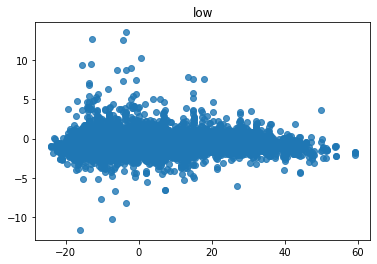

13520
LinregressResult(slope=-0.0024634722253984716, intercept=-0.5001674836893457, rvalue=-0.032786911103949795, pvalue=0.00013729667568622891, stderr=0.0006458882606637129, intercept_stderr=0.008637080914358853)




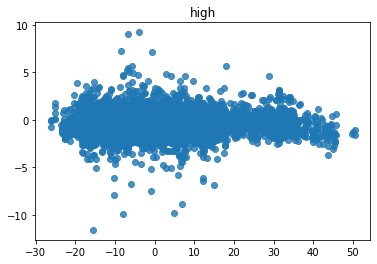

9261
LinregressResult(slope=0.003759476915968657, intercept=-0.4438874837404648, rvalue=0.04795647166436118, pvalue=3.891756545720912e-06, stderr=0.0008137634544743727, intercept_stderr=0.01091782584729669)




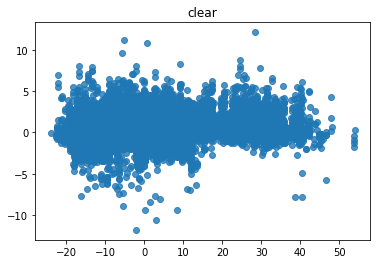

17290
LinregressResult(slope=0.011101028333939946, intercept=0.4411842341827042, rvalue=0.11037601616012695, pvalue=5.276156316330431e-48, stderr=0.0007602464432186098, intercept_stderr=0.010719269761374493)







mt


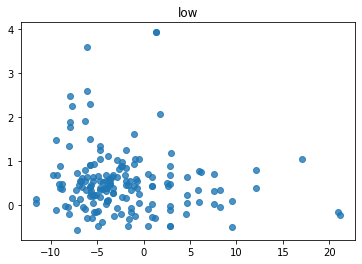

172
LinregressResult(slope=-0.0151253438226839, intercept=0.4740761478355914, rvalue=-0.11401425923408794, pvalue=0.13642413394146552, stderr=0.010108352215316252, intercept_stderr=0.06024918173481069)




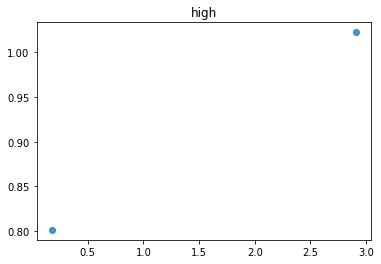

2
LinregressResult(slope=0.08084899987246359, intercept=0.7871403442837361, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)




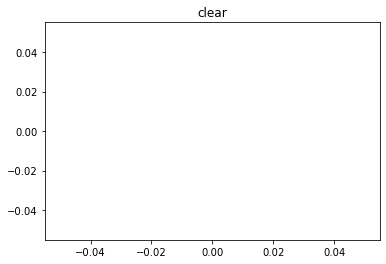

0


ValueError: Inputs must not be empty.

In [37]:
thresh = -1.8

for op in ['lt','mt']:
    
    print(op)

    for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],['low','high','clear']):
        
        dfc=dfc_.copy()
        
        var = 'Air temperature'

        if op =='lt':
            dfc = dfc[dfc[var]<thresh]
        else:
            dfc = dfc[dfc[var]>thresh]
                    
        dfc.dropna(inplace=True,subset=['stake_depth_anom','diff_anom'])

        plt.scatter(dfc['stake_depth_anom'],dfc['diff_anom'],label=op+name,alpha=0.8)
        plt.title(name)
        plt.show()
        
        print(dfc.shape[0])
        lr = linregress(dfc['stake_depth_anom'],dfc['diff_anom'])
        p = lr[3]
        s = lr[0]
        r = lr[2]
        print(lr)
        print()
        print(
        )
    print()
    print()
    print()
    print()
    print()

In [42]:
var = 'stake_depth_anom'
# var = 'stake_depth'

dicts = {n:{} for n in names}

for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],
                       names,
                    ):

    
    r_vals = []
    s_vals = []
    
    for i in np.arange(0,16):
        
        dfc=dfc_.copy()
        
        dfc = dfc[dfc['Wind speed']<i+0.4]
        dfc = dfc[dfc['Wind speed']>i-0.4]
        
        try:
            lr = linregress(dfc[var],dfc['diff_anom'])
#             lr = linregress(dfc['SD_anom'],dfc['diff'])
            p = lr[3]
            if p>0.05:raise
            s = lr[0]
            r = lr[2]
        except:
            r=np.nan
            s=np.nan
            
        r_vals.append(r)
        s_vals.append(s)
        
        if i == 0:
            
            dicts[name]['wind0'] = {'SD':dfc[var],
                                    'BLI':dfc['diff_anom']}
        
    dicts[name]['r'] = r_vals
    dicts[name]['s'] = s_vals
    

LinregressResult(slope=0.01135355228750186, intercept=-0.5021836681611483, rvalue=0.09947668082250202, pvalue=0.057261492910219876, stderr=0.0059525120003453445, intercept_stderr=0.07282884800894245)
LinregressResult(slope=0.016609026729189378, intercept=-0.3079009718297512, rvalue=0.12692367653832662, pvalue=0.10641497487930272, stderr=0.010229677905139045, intercept_stderr=0.1289890375347623)
LinregressResult(slope=0.04938199328108408, intercept=1.417650053384545, rvalue=0.27734503361430685, pvalue=2.061258964544518e-12, stderr=0.00688134913263423, intercept_stderr=0.08438213174439081)


/tmp/ipykernel_2381/4290652602.py:73: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0,wspace=0.07)


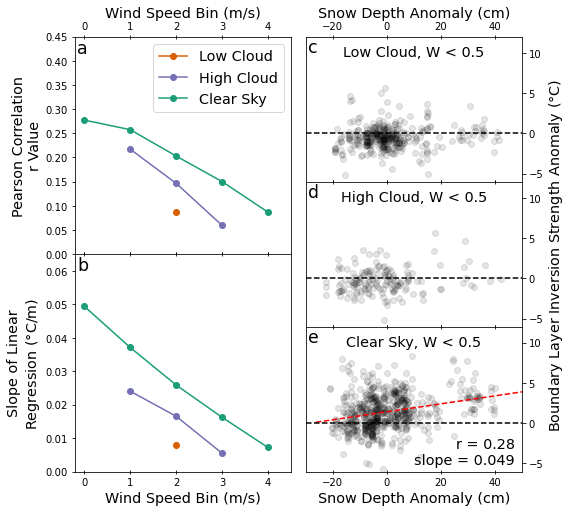

In [43]:
fig = plt.figure(constrained_layout=True,figsize=(8,8))

gs = GridSpec(6, 2, figure=fig)

ax1 = fig.add_subplot(gs[0:3,0])
ax2 = fig.add_subplot(gs[3:6,0])
ax3 = fig.add_subplot(gs[0:2,1])
ax4 = fig.add_subplot(gs[2:4,1])
ax5 = fig.add_subplot(gs[4:6,1])

for name,c in zip(names,colors):

    ax1.plot(np.arange(0,16),dicts[name]['r'],marker='o',label=name,color=c)
    ax2.plot(np.arange(0,16),dicts[name]['s'],marker='o',label=name,color=c)
    
ax1.set_xlim(-0.5,10.5)
ax1.set_ylim(0,0.45)
ax1.set_ylabel('Pearson Correlation\nr Value',fontsize='x-large')

ax2.set_ylim(0,0.065)
ax2.set_xlim(-0.5,10.5)
ax2.set_yticks(np.arange(0,0.061,0.01))

ax2.set_ylabel('Slope of Linear\nRegression ($\degree$C/m)',fontsize='x-large')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')

for ax in [ax1,ax2]:
    ax.set_xlabel('Wind Speed Bin (m/s)',fontsize='x-large')
    ax.set_xlim(-0.2,4.5)

ax1.legend(fontsize='x-large')
    

for name,c,ax in zip(names,colors,[ax3,ax4,ax5]):
    ax.scatter(dicts[name]['wind0']['SD'],
               dicts[name]['wind0']['BLI'],
               alpha=0.1,color='k')
    x=np.arange(np.min(df[var]),np.max(df[var]))
    lr = linregress(dicts[name]['wind0']['SD'],
               dicts[name]['wind0']['BLI'])
    print(lr)
    if lr[3]<0.05:
    
        ax.annotate(f'r = {np.round(lr[2],2)}\nslope = {np.round(lr[0],3)}',ha='right',va='bottom',xy=(0.97,0.03),fontsize='x-large',xycoords='axes fraction')
        ax.plot(x,x*lr[0]+lr[1],color='r',zorder=5,ls='--')
        
    ax.axhline(0,color='k',zorder=6,ls='--')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax.set_ylim(-6,12)
    ax.annotate(f'{name}, W < 0.5',ha='center',va='top',xy=(0.5,0.94),fontsize='x-large',xycoords='axes fraction')
    ax.set_xlim(-30,50)
    
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')

for ax in [ax3,ax5]:
    ax.set_xlabel('Snow Depth Anomaly (cm)',fontsize='x-large')
    
ax4.set_ylabel('Boundary Layer Inversion Strength Anomaly ($\degree$C)',fontsize='x-large')
    
for ax,letter in zip([ax1,ax2,ax3,ax4,ax5],string.ascii_letters):
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="x", direction="inout")
    ax.annotate(f'{letter}',
         xycoords='axes fraction',
         xy=(0.01,0.99),
         va='top',
         fontsize='xx-large')

    
fig.subplots_adjust(hspace=0,wspace=0.07)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/snow.png',dpi=400,bbox_inches='tight')

plt.show()

# CORRELATE NOT WITH SNOW DEPTH, BUT WITH SNOW CONDUCTIVITY!

In [ ]:
df = pickle.load(open('night_df.p','rb'))

df = df[~np.isnan(df['stake_depth'])]

df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]

In [ ]:
dens_file = '/home/robbie/Dropbox/sub_km/NP_transects/transect_densities.xlsx'

densities = {}
for station in np.arange(5,32):
    
    try:
        sheet = pd.read_excel(dens_file,sheet_name=str(station),parse_dates=True)
        densities[station] = sheet
    except:
        pass
    

def get_density(station,date):
    
    try:
        sheet = densities[int(station)]
    except:
        return np.nan
    
    dates = np.array([d.date() for d in sheet.columns[1:]])
    
    date_anoms = np.array([(date-d).days for d in dates])
    
    future_dates = dates[date_anoms<0]
    past_dates = dates[date_anoms>0]

    if future_dates.shape[0] and past_dates.shape[0]:
        a = future_dates[0]
        b = past_dates[-1]
#         print(a,b)
        am = np.nanmean(sheet[datetime.datetime(a.year,a.month,a.day)])
        bm = np.nanmean(sheet[datetime.datetime(b.year,b.month,b.day)])
        mean_density = (am+bm)/2
        
    else:
        nearest_date = dates[np.argmin(np.abs(date_anoms))]

        distance = np.min(np.abs(date_anoms))

        nd = nearest_date

        mean_density = np.nanmean(sheet[datetime.datetime(nd.year,nd.month,nd.day)])
    
        if distance>20:
            mean_density=np.nan
            
    return mean_density

def get_k(rho):
    
    """Generates a thermal conductivity (W/m3/K) from density.
    
    This is the heat that flows per second through 1m2 area 
    per metre of thickness per degree of temperature difference.
    
    From Calonne et al. (2011).
    
    https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2011GL049234
    
    """
    
    k = ( 2.5 * 10**(-6) * rho**2 ) - (1.23 * 10**(-4) * rho ) + 0.024
    
    return k

def get_abs_k(depth, k_per_metre):
    
    """This generates the absolute thermal conductivity for snow of given depth.
    
    This is the heat that flows through a square metre of snow per degree of temp diff.
    
    """

    k_abs = k_per_metre / depth
    
    return k_abs #W/m2K

In [ ]:
for df_dens in [df_cloudy_low,df_cloudy_high,df_clear_total]:

    df_dens['date'] = [d.date() for d in df_dens['dt']]

    # df['density'] = [get_density(station,date) for (station,date) in zip(df['NP'],df['date'])]

    dens = []
    for (station,date) in tqdm.tqdm(list(zip(df_dens['NP'],df_dens['date']))):
        dens.append(get_density(station,date))

    df_dens['density'] = np.array(dens)*100

    df_dens['cond'] = get_abs_k(df_dens['stake_depth'],get_k(df_dens['density']))

    df_dens['cond'][df_dens['cond']>1] = np.nan

    n=30
    
    day1 = np.min(df_dens['days_after_jan1'])
    day_last = np.max(df_dens['days_after_jan1'])

    variables = ['cond']

    rm_dict = {v:{} for v in variables}

    ranger = np.arange(day1,day_last+1)

    for i in ranger:

        dfrm = df_dens[df_dens['days_after_jan1']>i-(n/2)]
        dfrm = dfrm[dfrm['days_after_jan1']<i+(n/2)]

        for variable in variables:

            rm_dict[variable][i] = np.nanmean(dfrm[variable])
            
            
    anoms = []

    for i in tqdm.tqdm(df_dens.index):

        row = df_dens.loc[i]
        day = row['days_after_jan1']

        d = {'day':day}

        for variable in variables:

            rm = rm_dict[variable][day]
            val = row[variable]


            d[f'{variable}_anom'] = val-rm

        anoms.append(d)

    anoms_df = pd.DataFrame(anoms)
    anoms_df.index=df_dens.index
    df_dens = pd.concat([anoms_df,df_dens],axis=1)

    df_dens = df_dens.loc[:,~df_dens.columns.duplicated()].copy()





    df_dens.dropna(subset=['cond_anom','stake_depth_anom','diff_anom'],inplace=True)

    print(linregress(df_dens['stake_depth_anom'],df_dens['diff_anom']))
    print(linregress(df_dens['cond_anom'],df_dens['diff_anom']))
    print()

# Deeper snow is associated with colder snow relative to the air.

# So deeper snow accentuates the difference between snow and air when the snow is cold. But it limits the difference when the snow is relatively warm. 


# Why? Because thicker snow simply reduces heat flow from the ice. And heat *almost always* flows from the ice to the snow surface.

# This implies that the role of snow is not mediated by ice roughness - as that would simply act to reduce the temperature difference between ice and air..

In [ ]:
df = pickle.load(open('big_df2.p','rb'))

df = df[~np.isnan(df['stake_depth'])]

df_dens = df

df_dens['date'] = [d.date() for d in df_dens['dt']]

# df['density'] = [get_density(station,date) for (station,date) in zip(df['NP'],df['date'])]

dens = []
for (station,date) in tqdm.tqdm(list(zip(df_dens['NP'],df_dens['date']))):
    dens.append(get_density(station,date))

df_dens['density'] = np.array(dens)*100

df_dens['cond'] = get_abs_k(df_dens['stake_depth'],get_k(df_dens['density']))

df_dens['cond'][df_dens['cond']>1] = np.nan

n=30

day1 = np.min(df_dens['days_after_jan1'])
day_last = np.max(df_dens['days_after_jan1'])

variables = ['cond','diff','stake_depth']

rm_dict = {v:{} for v in variables}

ranger = np.arange(day1,day_last+1)

for i in ranger:

    dfrm = df_dens[df_dens['days_after_jan1']>i-(n/2)]
    dfrm = dfrm[dfrm['days_after_jan1']<i+(n/2)]

    for variable in variables:

        rm_dict[variable][i] = np.nanmean(dfrm[variable])


anoms = []

for i in tqdm.tqdm(df_dens.index):

    row = df_dens.loc[i]
    day = row['days_after_jan1']

    d = {'day':day}

    for variable in variables:

        rm = rm_dict[variable][day]
        val = row[variable]


        d[f'{variable}_anom'] = val-rm

    anoms.append(d)

anoms_df = pd.DataFrame(anoms)
anoms_df.index=df_dens.index
df_dens = pd.concat([anoms_df,df_dens],axis=1)

df_dens = df_dens.loc[:,~df_dens.columns.duplicated()].copy()

df = df_dens


In [ ]:
df = pickle.load(open('big_df2.p','rb'))

df = df[df['Surface temperature']<0]

df_cloudy_low = df[df['Low cloudiness']>9]
df_clear_total = df[df['Total cloudiness']<1]
df_clear_low = df[df['Low cloudiness']<1]
df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>8]




thresh = -1.8

for op in ['lt','mt']:
    
    print(op)

    for dfc_,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],['low','high','clear']):
        
        dfc=dfc_.copy()
        
        var = 'Air temperature'

        if op =='lt':
            dfc = dfc[dfc[var]<thresh]
        else:
            dfc = dfc[dfc[var]>thresh]
                    
        dfc.dropna(inplace=True,subset=['stake_depth_anom','diff_anom'])

        plt.scatter(dfc['stake_depth_anom'],dfc['diff_anom'],label=op+name,alpha=0.8)
        plt.show()
        print(dfc.shape[0])
        lr = linregress(dfc['stake_depth_anom'],dfc['diff_anom'])
        p = lr[3]
        s = lr[0]
        r = lr[2]
        print(lr)
    print()

In [ ]:
plt.figure(figsize=(10,8))
plt.hexbin(df['days_after_jan1'],df['diff'])
plt.ylim(-5,5)

In [ ]:
plt.figure(figsize=(10,8))
plt.hexbin(df['days_after_jan1'],df['stake_depth'])
# plt.ylim(-5,5)

In [ ]:
plt.hexbin(df['days_after_jan1'],df['Air temperature'])

In [ ]:
linregress(df['diff'],df['Air temperature'])

In [ ]:
from sklearn import linear_model

In [ ]:

for d in [df_cloudy_high,df_clear_total]:

    lr = linregress(d['diff'],d['Air temperature'])[2]**2
    print(lr)
    
    
    lr = linregress(d['diff'],d['stake_depth'])[2]**2
    print(lr)
    
    print()

In [ ]:
regr = linear_model.LinearRegression()

inputs = d[['Air temperature','stake_depth']]

r = regr.fit(inputs,d['diff'])

r.score(inputs,d['diff'])